In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plot
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

ModuleNotFoundError: No module named 'tensorflow'

In [408]:
# Study data files
diabetes_binary_health_path = "Ressources/diabetes_binary_health_indicators_BRFSS2015.csv"
# Read the  data and the study results
df_diabetes = pd.read_csv(diabetes_binary_health_path)

df_diabetes


,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [409]:
df_diabetes.shape

(253680, 22)

In [410]:
# df_diabetes.dtypes

In [411]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [412]:
df_diabetes.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [413]:
df_diabetes.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


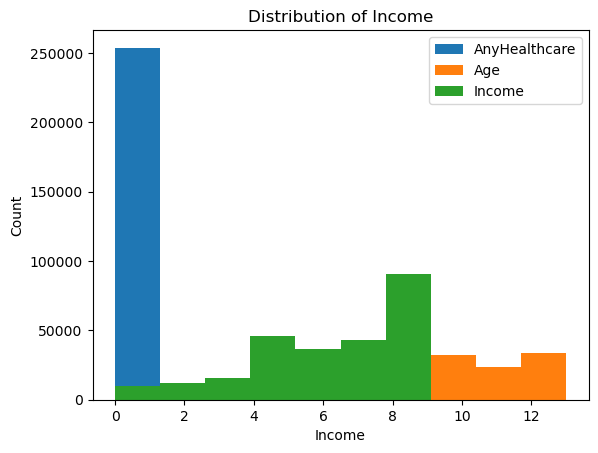

In [414]:
# Plot a histogram of 'Income' column in df_diabetes
df_diabetes[['AnyHealthcare', 'Age', 'Income']].plot(kind='hist')
plt.title('Distribution of Income')
plt.xlabel('Income')
# hue='Income',
plt.ylabel('Count')
plt.show()


In [415]:
df_diabetes_corr = df_diabetes[['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']].dropna().corr()

df_diabetes_corr

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


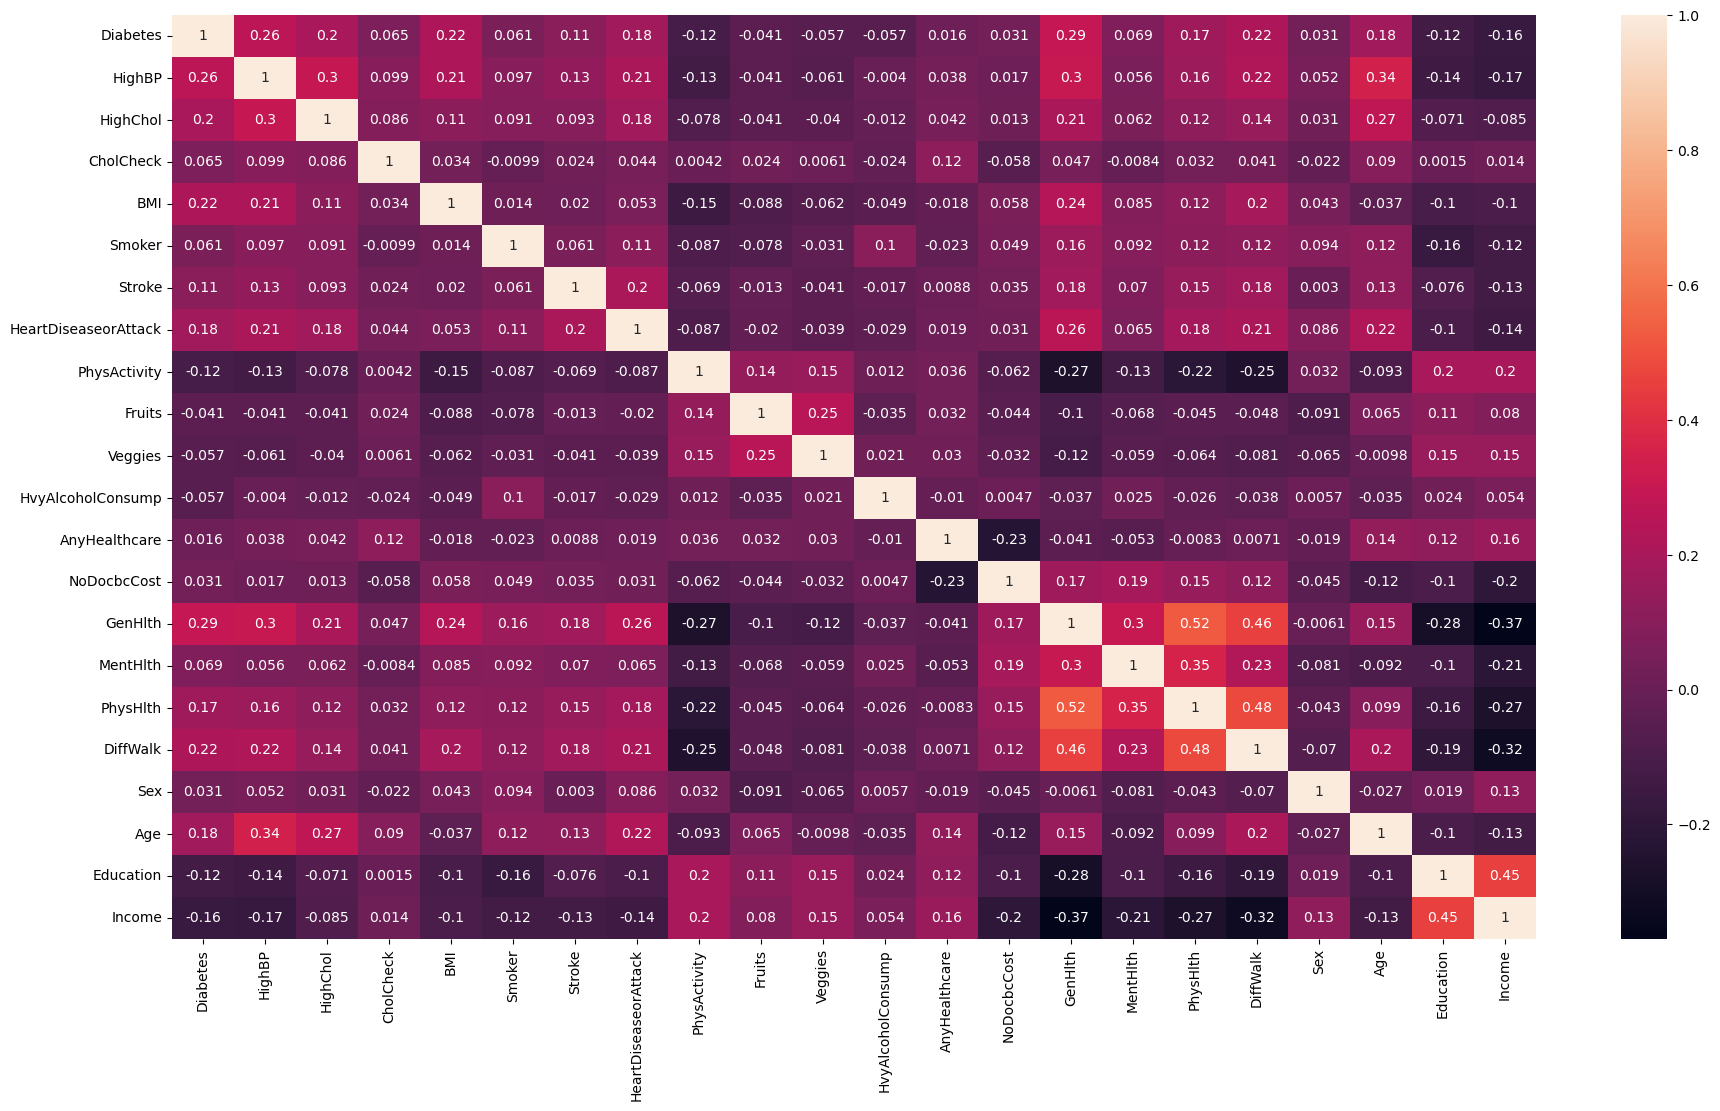

In [416]:
fig, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(df_diabetes_corr, annot=True, ax=ax)
plt.show()

In [417]:
# dislay a plot of target correlations
target = df_diabetes_corr['Diabetes']

<function matplotlib.pyplot.show(close=None, block=None)>

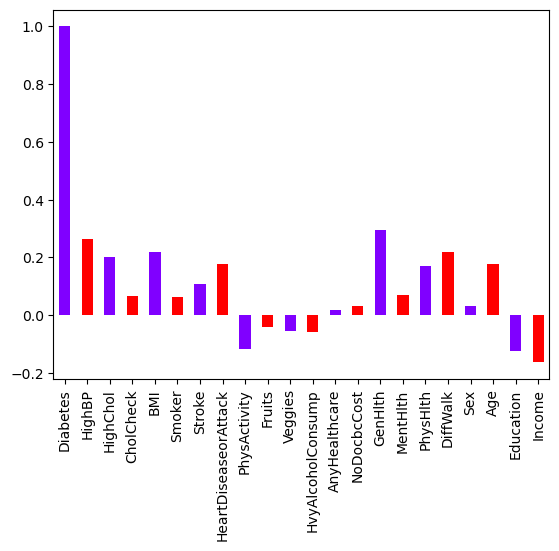

In [418]:
colors = cm.rainbow(np.linspace(0, 1, len(class_counts)))
target.plot(kind='bar', color=colors, align='center')
plt.show

In [419]:
# select our model

In [420]:
# split the dataset into feature and target

In [421]:
X = df_diabetes.drop('Diabetes', axis=1)
y = df_diabetes['Diabetes']

In [422]:
# review the y variable
y

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: Diabetes, Length: 253680, dtype: int64

In [423]:
# review the x variable
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [424]:
# check the balance of our target values
class_counts = df_diabetes[['Diabetes']].value_counts()
print(class_counts)

Diabetes
0           218334
1            35346
dtype: int64


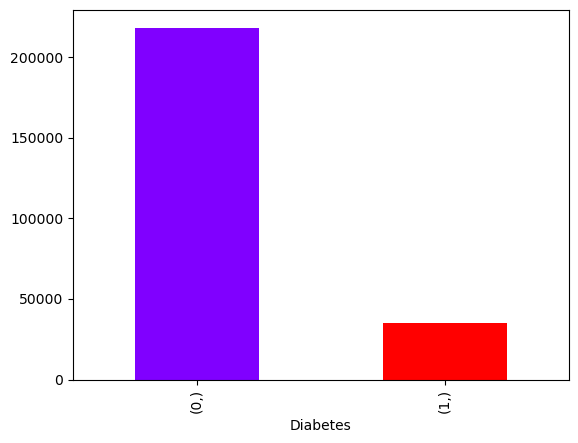

In [425]:
# display the counts in a bar chart 
colors = cm.rainbow(np.linspace(0, 1, len(class_counts)))
# Plot the bar chart using the generated colors
class_counts.plot(kind='bar', color=colors, align='center')
plt.show()

In [429]:
# SUPERVISED LEARNING MODEL

In [430]:
# split the data into training and testing dadaset by train_test_split.

In [431]:
# split the data using trasin_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [432]:
# create a logistic Regression model with the data

In [433]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'lbfgs', max_iter =200, random_state =1)
# fit the model using training data
model.fit(X_train, y_train)

/Users/marceauaugustin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

In [434]:
# save the prediction

In [435]:
# make a prediction using the testing data

In [436]:
y_predict = model.predict(X_test)

y_predict_df = pd.DataFrame({'y_test':y_test, 'y_predict': y_predict})
y_predict_df

,y_test,y_predict
235899,0,0
74852,1,0
8205,0,0
127632,1,0
32021,0,0
...,...,...
52177,0,0
94042,1,0
188075,0,0
16561,0,0


In [437]:
# Evaluate the model's performance 

In [438]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_predict)
# print the accuracy_score
print("The Accuracy_Score is:", accuracy)

The Accuracy_Score is: 0.8625630715862503


In [439]:
# calculate the balance accuracy
balanced_accuracy = balanced_accuracy_score (y_test, y_predict)
# print the balanced_accuracy_score
print("The balance_accuracy_Score is:", balanced_accuracy )

The balance_accuracy_Score is: 0.5659517767503113


In [440]:
# genarate a confusion matrix for the model
cm = confusion_matrix(y_test, y_predict)
# print the confusion matrix
print("The confusion matrix is", cm)

The confusion matrix is [[42669  1002]
 [ 5971  1094]]


In [441]:
# print the classificartion report for the model
print("Confusion Matrix")
display(cm)
m1br = balanced_accuracy
print(f"Accuracy_Score:{accuracy}")
print("Classification Report")
m1cr = classification_report(y_test, y_predict)
print(m1cr)
print(m1cr)

Confusion Matrix


array([[42669,  1002],
       [ 5971,  1094]])

Accuracy_Score:0.8625630715862503
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43671
           1       0.52      0.15      0.24      7065

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43671
           1       0.52      0.15      0.24      7065

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



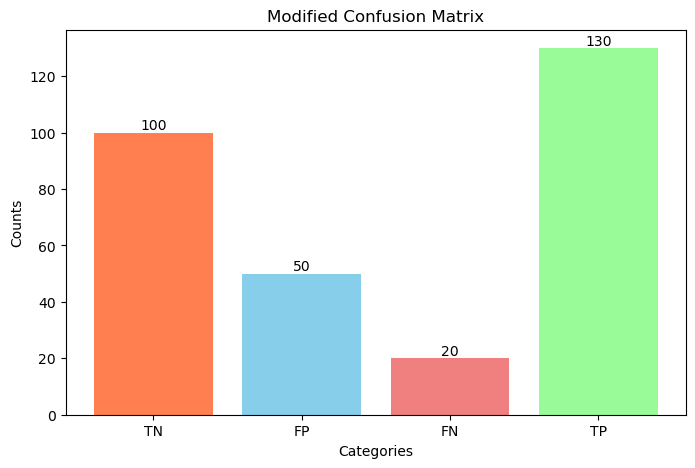

In [442]:
# Create a list to store the TN, FP, FN, TP values for plotting
# modified_cm = []
# for index, value in enumerate(cm):
#     if index == 0:
#         modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
#     if index == 1:
#         modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

# plt.figure(figsize=(10, 5))
# sns.heatmap(cm, annot=np.array(modified_cm),
#             fmt="",
#             linewidths=0.1,
#             square=True,
#             cmap='Blues',
#             xticklabels=[""],
#             yticklabels=[""])
# plt.ylabel("Actual label", fontsize=10)
# plt.xlabel("Predicted label", fontsize=10)
# plt.title("Balanced Accuracy Score: {:.3f}".format(balanced_accuracy), size=10)
# plt.tick_params(labelsize=10)
# plt.show()

# Example data
modified_cm = [['TN = 100', 'FP = 50'], ['FN = 20', 'TP = 130']]

# Extract values from modified_cm
values = [[int(item.split('=')[1].strip()) for item in row] for row in modified_cm]

# Categories for x-axis
categories = ['TN', 'FP', 'FN', 'TP']

# Bar colors
colors = ['#FF7F50', '#87CEEB', '#F08080', '#98FB98']

# Plotting the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values[0] + values[1], color=colors)

# Adding labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# Setting the title and labels
plt.title("Modified Confusion Matrix")
plt.xlabel("Categories")
plt.ylabel("Counts")

# Display the plot
plt.show()


In [443]:
#  USING THE NEURAL NETWORK MODEL

In [444]:
# select the model

In [445]:
# split the preprocessed into our features and target arrays
X = df_diabetes.drop(["Diabetes"], axis ="columns").values
y = df_diabetes["Diabetes"].values

In [446]:
# split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42, stratify=y)

In [447]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [448]:
# compile train and evaluate ther model

In [449]:
number_input_features = len(X_train[0])

hidden_nodes_layer1 = 32
hidden_nodes_layer2 = 24
model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# train the model
# fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Check the structure of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                704       
                                                                 
 dense_16 (Dense)            (None, 24)                792       
                                                                 
 dense_17 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [450]:
# compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [451]:
# train the model
epochs = 50
history = fit_model = model.fit(X_train_scaled,y_train,epochs=50)


Epoch 1/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3184 - accuracy: 0.8650
Epoch 2/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3132 - accuracy: 0.8668
Epoch 3/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3125 - accuracy: 0.8672
Epoch 4/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3121 - accuracy: 0.8671
Epoch 5/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3115 - accuracy: 0.8673
Epoch 6/50
5946/5946 [==============================] - 8s 1ms/step - loss: 0.3112 - accuracy: 0.8675
Epoch 7/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3108 - accuracy: 0.8676
Epoch 8/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3106 - accuracy: 0.8675
Epoch 9/50
5946/5946 [==============================] - 7s 1ms/step - loss: 0.3103 - accuracy: 0.8677
Epoch 10/50
5946/5946 [==============================] - 8s 1ms/step - loss: 0.310

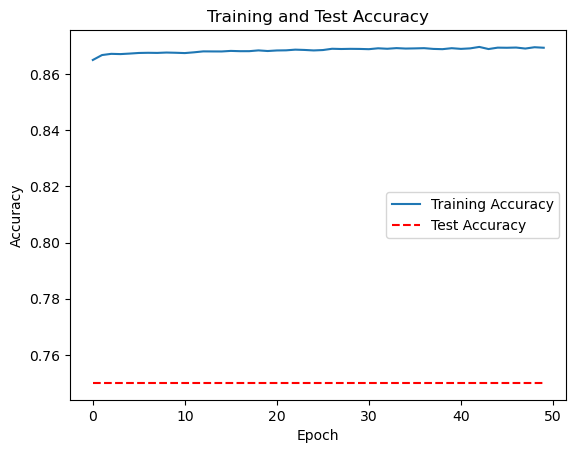

In [452]:
# Assuming you have the following variables:
epochs = 50
history = {}  # Contains training accuracy values
test_accuracy = 0.75  # Test accuracy value

plt.plot(fit_model.history['accuracy'], label='Training Accuracy')
# plt.plot(fit_model.history['accuracy'], label='Test Accuracy')
plt.plot([0, epochs - 1], [test_accuracy] * 2, 'r--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')
plt.show()



In [396]:
# evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose =2)
print(f"Loss:{model_loss}, Accuracy:{model_accuracy}")

1982/1982 - 2s - loss: 0.6198 - accuracy: 0.8606 - 2s/epoch - 782us/step
Loss:0.619773805141449, Accuracy:0.8605960011482239
